In [1]:
from googleapiclient.discovery import build 
import pandas as pd
import seaborn as sns

In [2]:
api_key = 'ENTER YOUR API KEY' 
# channel_id = 'UCeVMnSShP_Iviwkknt83cww'  # CodeWithHarry
channel_ids = ['UCOhHO2ICt0ti9KAh-QHvttQ' , # Technical Guruji
               'UCdp6GUwjKscp5ST4M4WgIpw',  # TechWiser
               'UCXUJJNoP1QupwsYIWFXmsZg',  # Tech Burner
               'UCEPL07qzVsOcHd3sMUws65g',  # Trakin Tech
               'UCdoDYkupTElV62K7ttA_E4w']  # TechBar

youtube = build('youtube', 'v3', developerKey=api_key)   # Created the Youtube service

## Function to get channel statistics

In [3]:
# def get_channel_stats(youtube, channel_id):
    
#    request = youtube.channels().list(
#        part='snippet,contentDetails,statistics',
#        id=channel_id)
#    response = request.execute()

#    data = dict(Channel_name = response['items'][0]['snippet']['title'],
#                Subscribers = response['items'][0]['statistics']['subscriberCount'],
#                Views = response['items'][0]['statistics']['viewCount'],
#                Total_videos = response['items'][0]['statistics']['videoCount'])
    
#    return data    

In [4]:
# def get_channel_stats(youtube, channel_ids):
    
#     all_data = []  # Empty list
    
#     request = youtube.channels().list(
#         part='snippet,contentDetails,statistics',
#         id=','.join(channel_ids))   # Because we cannot pass here list, so we converted it to string.
#     response = request.execute()

#     for i in range(len(response['items'])):
#         data = dict(Channel_name = response['items'][i]['snippet']['title'],
#                     Subscribers = response['items'][i]['statistics']['subscriberCount'],
#                     Views = response['items'][i]['statistics']['viewCount'],
#                     Total_videos = response['items'][i]['statistics']['videoCount'],
#                     playlist_id = response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
#         all_data.append(data)
#     return all_data
#     # return response

from functools import reduce

def get_channel_stats(youtube, channel_ids):
    
    # Function to map over each item
    def map_channel_data(item):
        return dict(
            Channel_name=item['snippet']['title'],
            Subscribers=item['statistics']['subscriberCount'],
            Views=item['statistics']['viewCount'],
            Total_videos=item['statistics']['videoCount'],
            playlist_id=item['contentDetails']['relatedPlaylists']['uploads']
        )

    # Function to reduce the mapped items into a single list
    def reduce_channel_data(acc, item):
        acc.append(map_channel_data(item))
        return acc
    
    # Fetching the data from YouTube API
    request = youtube.channels().list(
        part='snippet,contentDetails,statistics',
        id=','.join(channel_ids)
    )
    response = request.execute()

    # Applying mapReduce
    all_data = reduce(reduce_channel_data, response['items'], [])
    
    return all_data


In [5]:
channel_statistics = get_channel_stats(youtube, channel_ids)
channel_statistics

[{'Channel_name': 'Tech Burner',
  'Subscribers': '11700000',
  'Views': '2100195579',
  'Total_videos': '1308',
  'playlist_id': 'UUXUJJNoP1QupwsYIWFXmsZg'},
 {'Channel_name': 'TechWiser',
  'Subscribers': '2140000',
  'Views': '557751235',
  'Total_videos': '1174',
  'playlist_id': 'UUdp6GUwjKscp5ST4M4WgIpw'},
 {'Channel_name': 'Trakin Tech',
  'Subscribers': '14400000',
  'Views': '2659549894',
  'Total_videos': '3954',
  'playlist_id': 'UUEPL07qzVsOcHd3sMUws65g'},
 {'Channel_name': 'Technical Guruji',
  'Subscribers': '23500000',
  'Views': '3698214690',
  'Total_videos': '5483',
  'playlist_id': 'UUOhHO2ICt0ti9KAh-QHvttQ'},
 {'Channel_name': 'TechBar',
  'Subscribers': '4890000',
  'Views': '1328942527',
  'Total_videos': '1410',
  'playlist_id': 'UUdoDYkupTElV62K7ttA_E4w'}]

In [6]:
# Using Pandas:
channel_data = pd.DataFrame(channel_statistics)
channel_data

,Channel_name,Subscribers,Views,Total_videos,playlist_id
0,Tech Burner,11700000,2100195579,1308,UUXUJJNoP1QupwsYIWFXmsZg
1,TechWiser,2140000,557751235,1174,UUdp6GUwjKscp5ST4M4WgIpw
2,Trakin Tech,14400000,2659549894,3954,UUEPL07qzVsOcHd3sMUws65g
3,Technical Guruji,23500000,3698214690,5483,UUOhHO2ICt0ti9KAh-QHvttQ
4,TechBar,4890000,1328942527,1410,UUdoDYkupTElV62K7ttA_E4w


In [7]:
channel_data.dtypes

Channel_name    object
Subscribers     object
Views           object
Total_videos    object
playlist_id     object
dtype: object

In [8]:
channel_data['Subscribers'] = pd.to_numeric(channel_data['Subscribers'])
channel_data['Views'] = pd.to_numeric(channel_data['Views'])
channel_data['Total_videos'] = pd.to_numeric(channel_data['Total_videos'])

In [9]:
channel_data.dtypes

Channel_name    object
Subscribers      int64
Views            int64
Total_videos     int64
playlist_id     object
dtype: object

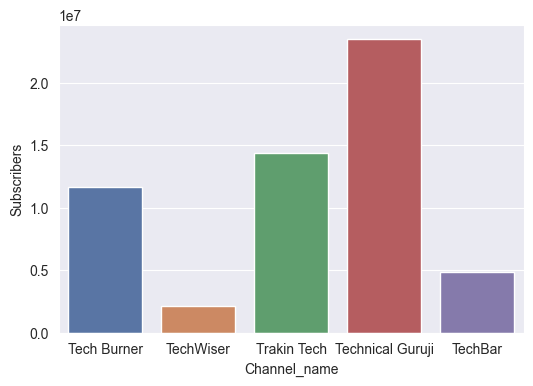

In [10]:
sns.set({'figure.figsize': (6, 4)})
ax = sns.barplot(x='Channel_name', y='Subscribers', data=channel_data)

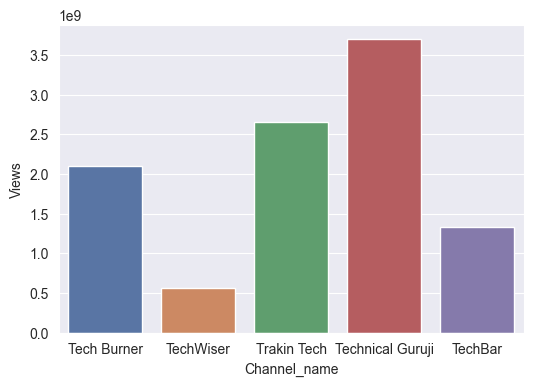

In [11]:
ax = sns.barplot(x='Channel_name', y='Views', data=channel_data)

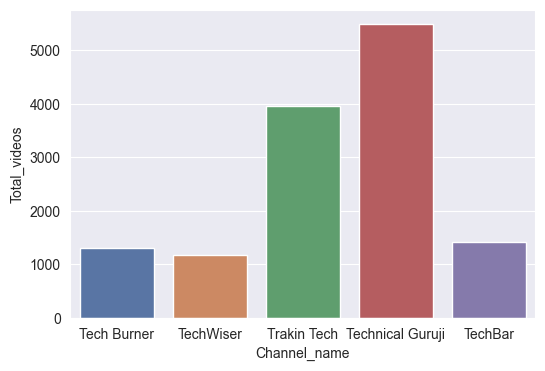

In [12]:
ax = sns.barplot(x='Channel_name', y='Total_videos', data=channel_data)

**Function to get video ids**

In [13]:
playlist_id = channel_data.loc[channel_data['Channel_name']=='Tech Burner', 'playlist_id'].iloc[0]

In [14]:
playlist_id

'UUXUJJNoP1QupwsYIWFXmsZg'

In [15]:
def get_video_ids(youtube, playlist_id):
    request = youtube.playlistItems().list(
        part = 'contentDetails',
        playlistId = playlist_id,
        maxResults = 50)
    response = request.execute()

    video_ids = []

    for i in range(len(response['items'])):
        video_ids.append(response['items'][i]['contentDetails']['videoId'])
    
    next_page_token = response.get('nextPageToken')
    more_pages = True

    while more_pages:
        if next_page_token is None:
            more_pages = False
        else:
            request = youtube.playlistItems().list(
                part = 'contentDetails',
                playlistId = playlist_id,
                maxResults = 50,
                pageToken = next_page_token)
            response = request.execute()

            for i in range(len(response['items'])):
                video_ids.append(response['items'][i]['contentDetails']['videoId'])

            next_page_token = response.get('nextPageToken')
    
    return video_ids
    # return response

Note that YouTube service will only give 5 values bydefault, And we can extract maximum 50 values using maxResults parameter. So we need to write some logic to extract all the video_ids from a particular channel. (Logic is written above) 

In [16]:
video_ids = get_video_ids(youtube, playlist_id)
video_ids

['TZVmwu11-jI',
 'NjoqMPsIioY',
 'UsBR_KfQG5s',
 'rXKhzWFlYW8',
 'G86hGrhB5tw',
 '8nc9QG-Ljvo',
 'HdpgOBrthOY',
 '4wrZtlXEp0o',
 'hzs4iAkNtWU',
 'Qq5BCbL2WEs',
 'IANPKUiltuU',
 'K1Ov6HHIf48',
 'CaHXs7x8ty8',
 '7nNnudgt2hU',
 'GvL46rnAXYE',
 'kpV8ITBCuQ4',
 'XW2Lxuv-f1g',
 '_wsimG1B5Q4',
 'twZNsoDkJvc',
 'MzcQE2N65MI',
 'GOTGaOzJYEI',
 'I6upHAy5HSw',
 'unTr-Od-7D8',
 'TDvjEc7FCic',
 'Gj7LUVIVPpI',
 '9S7Ng6mPQaw',
 '2zhUebETcUI',
 '7MQ2hLLoHZY',
 'Lhu10K0lQ5k',
 'FM_nepotbw4',
 'aJabku0cPC4',
 '_uq2MwOXpxU',
 'kEIUeS9BhdI',
 '5oDlPjpWatA',
 'ca3olsISV04',
 'DVtzFSN7jp8',
 'gs22E2n6WLo',
 'qg0NuvSsLkY',
 'CKmPvmDXPG8',
 '8j9jD58X774',
 'UHtKXa7Rxnw',
 'p05vyNIPpD0',
 'bnJw9v0YN34',
 'KvzzhAzOKt8',
 '752VrWuZ-vY',
 'wCdhxZ9fsXI',
 'q3v0Tyt3oCQ',
 'kf3M6MBF9CM',
 '1NFa83qUm4o',
 'JHUYZVfWVF8',
 'Lzq-2r6ah-g',
 '3ub-l8pYmdQ',
 'djJKuJdo51I',
 'XoBFrihBwSM',
 'ACr64Eu82JE',
 '5uOLxAcihOw',
 '0oH-r1kUxCk',
 'gL-Ydo-5HDw',
 'JGHtSc63WPM',
 'VAuyLN5ILHw',
 'eXbVpXvkKsg',
 'ScWfuoXPk2o',
 'incKwx

Writing the function to fetch the video details

In [17]:
def get_video_details(youtube, video_ids):
    all_video_stats = []
    
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part= "snippet, statistics",
            id= ','.join(video_ids[i:i+50]))
        response = request.execute()
        
        for video in response['items']:
            video_stats = dict(Title = video['snippet']['title'],
                               Published_date = video['snippet']['publishedAt'],
                               Views = video['statistics']['viewCount'],
                               Likes = video['statistics']['likeCount'],
                               Comments = video['statistics']['commentCount'])
            all_video_stats.append(video_stats)
            
    return all_video_stats

In [18]:
video_details = get_video_details(youtube, video_ids)
video_details

[{'Title': "World's Most Powerful Mini Gaming Laptop ! *Lenovo Legion Go*",
  'Published_date': '2024-06-28T13:47:55Z',
  'Views': '304200',
  'Likes': '12957',
  'Comments': '556'},
 {'Title': 'How to Play GTA 5 on Android Smartphone ! *50 FPS*',
  'Published_date': '2024-06-26T18:28:26Z',
  'Views': '1297993',
  'Likes': '74468',
  'Comments': '3366'},
 {'Title': 'This Smartphone is Confusing ! *OnePlus Nord CE 4 Lite*',
  'Published_date': '2024-06-24T13:51:41Z',
  'Views': '377014',
  'Likes': '14969',
  'Comments': '788'},
 {'Title': '10 Best Upcoming Smartphones of July 2024 !',
  'Published_date': '2024-06-24T08:52:51Z',
  'Views': '723358',
  'Likes': '25605',
  'Comments': '1057'},
 {'Title': 'I Tried this Smart Health Ring !',
  'Published_date': '2024-06-23T07:13:34Z',
  'Views': '402177',
  'Likes': '14390',
  'Comments': '482'},
 {'Title': 'Best Deals on Samsung Devices for Students ! *Back to Campus Sale*',
  'Published_date': '2024-06-22T11:12:55Z',
  'Views': '316742',


In [19]:
video_data = pd.DataFrame(video_details)
video_data

,Title,Published_date,Views,Likes,Comments
0,World's Most Powerful Mini Gaming Laptop ! *Le...,2024-06-28T13:47:55Z,304200,12957,556
1,How to Play GTA 5 on Android Smartphone ! *50 ...,2024-06-26T18:28:26Z,1297993,74468,3366
2,This Smartphone is Confusing ! *OnePlus Nord C...,2024-06-24T13:51:41Z,377014,14969,788
3,10 Best Upcoming Smartphones of July 2024 !,2024-06-24T08:52:51Z,723358,25605,1057
4,I Tried this Smart Health Ring !,2024-06-23T07:13:34Z,402177,14390,482
...,...,...,...,...,...
1305,How to Install OFFICIAL Android 5.0 Lollipop o...,2014-12-07T02:13:49Z,198444,946,264
1306,How to Install Android 5.0 Lollipop(Cm12 Stabl...,2014-11-24T21:35:01Z,120755,1321,187
1307,"Android Lollipop Calendar (NEXUS 6) LEAKED , I...",2014-10-24T15:42:55Z,79877,1375,121
1308,Android Lollipop Launcher Installation and Dow...,2014-10-22T14:08:17Z,389889,5578,515


In [20]:
# Modifying the DataFrame:
video_data['Published_date'] = pd.to_datetime(video_data['Published_date']).dt.date
video_data['Views'] = pd.to_numeric(video_data['Views'])
video_data['Likes'] = pd.to_numeric(video_data['Likes'])
video_data['Comments'] = pd.to_numeric(video_data['Comments'])

In [21]:
video_data.dtypes

Title             object
Published_date    object
Views              int64
Likes              int64
Comments           int64
dtype: object

In [22]:
video_data

,Title,Published_date,Views,Likes,Comments
0,World's Most Powerful Mini Gaming Laptop ! *Le...,2024-06-28,304200,12957,556
1,How to Play GTA 5 on Android Smartphone ! *50 ...,2024-06-26,1297993,74468,3366
2,This Smartphone is Confusing ! *OnePlus Nord C...,2024-06-24,377014,14969,788
3,10 Best Upcoming Smartphones of July 2024 !,2024-06-24,723358,25605,1057
4,I Tried this Smart Health Ring !,2024-06-23,402177,14390,482
...,...,...,...,...,...
1305,How to Install OFFICIAL Android 5.0 Lollipop o...,2014-12-07,198444,946,264
1306,How to Install Android 5.0 Lollipop(Cm12 Stabl...,2014-11-24,120755,1321,187
1307,"Android Lollipop Calendar (NEXUS 6) LEAKED , I...",2014-10-24,79877,1375,121
1308,Android Lollipop Launcher Installation and Dow...,2014-10-22,389889,5578,515


In [23]:
top10_videos = video_data.sort_values(by='Views', ascending=False).head(10)
top10_videos

,Title,Published_date,Views,Likes,Comments
804,5 Majedaar Gadgets I bought Online !,2020-01-26,10134871,518012,7813
482,"I made Custom ₹5,00,000 PC for @souravjoshivlo...",2021-12-02,9220507,477372,5563
518,Don't Buy Wireless Earphone before Watching th...,2021-09-28,8227804,309010,9043
361,Nothing Phone (1) *New Midrange King* ?,2022-07-13,8081195,352824,6892
416,This is My Most Expensive Unboxing! *BMW*,2022-04-06,7961271,492237,11651
520,7 Majedaar Smartphone Gaming Gadgets you Shoul...,2021-09-24,7904628,318417,3692
920,Trying 5 Weird SmartPhone Life Hacks #ASLI SACH,2019-04-26,7746436,356986,5366
394,I Bought a Rs.30000 AI Dancing Robot !,2022-05-09,7635299,248637,4212
234,Why Rolls Royce Cars Are So Expensive?,2023-03-04,7589002,238167,3895
406,Don't Buy Smartwatch before Watching this Vide...,2022-04-24,7408608,226852,5021


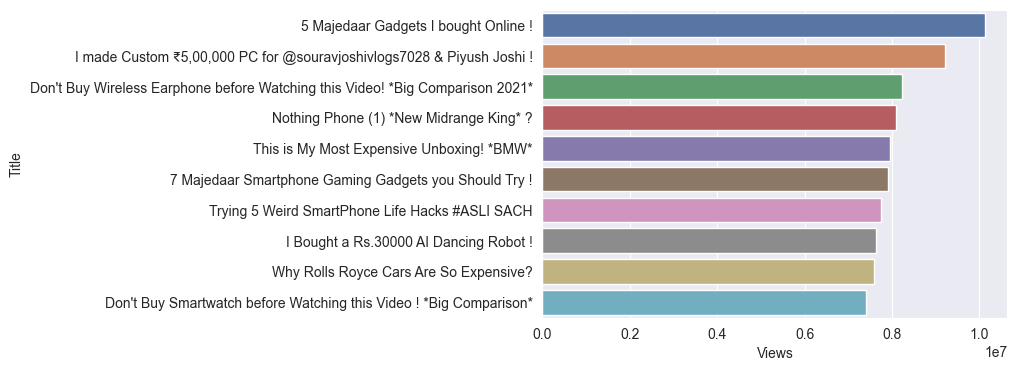

In [24]:
ax1 = sns.barplot(x='Views', y='Title', data=top10_videos)

In [25]:
video_data['Month'] = pd.to_datetime(video_data['Published_date']).dt.strftime('%b')

In [26]:
video_data

,Title,Published_date,Views,Likes,Comments,Month
0,World's Most Powerful Mini Gaming Laptop ! *Le...,2024-06-28,304200,12957,556,Jun
1,How to Play GTA 5 on Android Smartphone ! *50 ...,2024-06-26,1297993,74468,3366,Jun
2,This Smartphone is Confusing ! *OnePlus Nord C...,2024-06-24,377014,14969,788,Jun
3,10 Best Upcoming Smartphones of July 2024 !,2024-06-24,723358,25605,1057,Jun
4,I Tried this Smart Health Ring !,2024-06-23,402177,14390,482,Jun
...,...,...,...,...,...,...
1305,How to Install OFFICIAL Android 5.0 Lollipop o...,2014-12-07,198444,946,264,Dec
1306,How to Install Android 5.0 Lollipop(Cm12 Stabl...,2014-11-24,120755,1321,187,Nov
1307,"Android Lollipop Calendar (NEXUS 6) LEAKED , I...",2014-10-24,79877,1375,121,Oct
1308,Android Lollipop Launcher Installation and Dow...,2014-10-22,389889,5578,515,Oct


In [27]:
videos_per_month = video_data.groupby('Month', as_index=False).size()

In [28]:
videos_per_month

,Month,size
0,Apr,119
1,Aug,110
2,Dec,105
3,Feb,112
4,Jan,108
5,Jul,107
6,Jun,115
7,Mar,125
8,May,116
9,Nov,84


In [29]:
sort_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [30]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'], categories=sort_order, ordered=True)

In [31]:
videos_per_month = videos_per_month.sort_index()
videos_per_month

,Month,size
Month,,
Jan,Jan,108
Feb,Feb,112
Mar,Mar,125
Apr,Apr,119
May,May,116
Jun,Jun,115
Jul,Jul,107
Aug,Aug,110
Sep,Sep,103


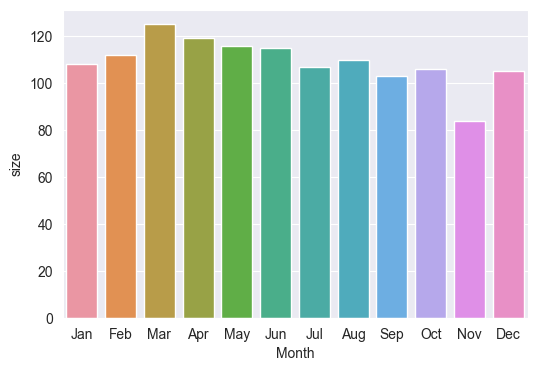

In [32]:
ax3 = sns.barplot(x='Month', y='size' ,data=videos_per_month)

In [33]:
video_data.to_csv('video_details(Tech Burner).csv')